In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### Random data

In [3]:
# Using Make blobs to intentionally create a blobs around a bunch of points on a graph for clustering
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

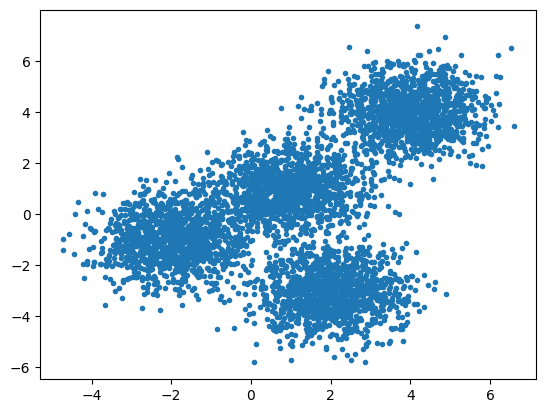

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [8]:
"""
init = k-means++: Selects initial cluster centers for k-mean clustering based on an empirical probability distribution
of the points’ contribution to the overall inertia

n_clusters = number of clusters

n_init = Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the 
best output of n_init consecutive runs in terms of inertia.
"""

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 1, ..., 1, 0, 2], dtype=int32)

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.9852207 , -0.9986966 ],
       [ 3.97131999,  4.0059935 ],
       [ 2.0123885 , -3.06243995],
       [ 0.96830105,  0.97802188]])

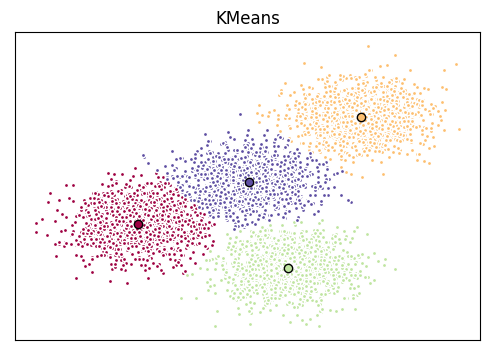

In [10]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

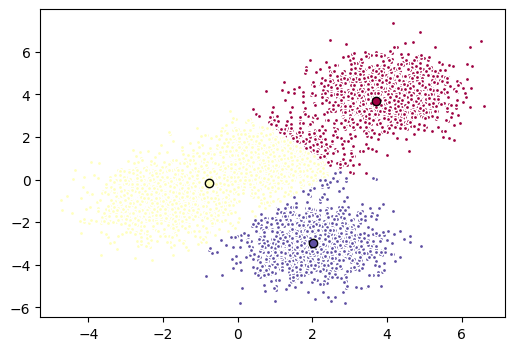

In [12]:
# Seeing what happens when you set lower than optimal clusters
k_means2 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means2.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means2.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means2.cluster_centers_)), colors):
    my_members = (k_means2.labels_ == k)
    cluster_center = k_means2.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

### Customer Segmentation Data

In [13]:
import pandas as pd
cust_df = pd.read_csv("data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [14]:
# Dropping address as k-means isn't as meaningful for categorical variables
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [15]:
from sklearn.preprocessing import StandardScaler
# Normalize over the Standard Deviation so magnitudes of variables changes are measured equally
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [16]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

In [17]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [18]:
# Getting Centroid values by averaging all data points with each label
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


[41. 47. 33. 29. 47. 40. 38. 42. 26. 47. 44. 34. 24. 46. 28. 24. 29. 43.
 44. 36. 29. 36. 28. 45. 37. 43. 24. 37. 38. 34. 40. 42. 23. 40. 28. 33.
 35. 37. 22. 39. 20. 48. 28. 37. 48. 45. 22. 30. 28. 29. 47. 36. 24. 56.
 29. 34. 32. 27. 40. 50. 39. 34. 36. 44. 24. 31. 34. 26. 38. 24. 30. 40.
 30. 25. 29. 33. 43. 35. 41. 46. 33. 30. 40. 38. 49. 26. 22. 29. 28. 23.
 37. 35. 31. 29. 34. 47. 37. 38. 32. 22. 30. 38. 36. 44. 27. 47. 41. 25.
 33. 42. 36. 25. 30. 24. 32. 39. 30. 33. 32. 33. 29. 28. 33. 39. 32. 46.
 32. 28. 26. 27. 35. 35. 31. 32. 29. 35. 48. 24. 44. 40. 36. 23. 26. 30.
 34. 28. 37. 46. 24. 25. 33. 46. 38. 47. 34. 35. 39. 44. 28. 31. 24. 36.
 35. 31. 28. 36. 31. 30. 26. 48. 39. 31. 31. 27. 31. 53. 40. 26. 29. 52.
 39. 33. 24. 47. 41. 26. 48. 37. 37. 46. 30. 47. 37. 37. 40. 35. 21. 52.
 47. 41. 47. 38. 22. 39. 45. 51. 33. 43. 40. 27. 31. 34. 37. 44. 42. 25.
 39. 26. 36. 48. 21. 40. 31. 23. 31. 31. 50. 29. 37. 46. 39. 34. 27. 23.
 41. 29. 44. 24. 32. 23. 31. 36. 25. 26. 43. 47. 43

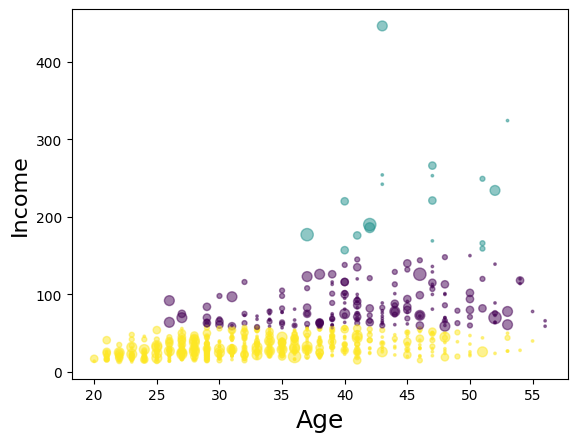

In [24]:
# Size of bubbles in chart determined by years of education
area = np.pi * ( X[:, 1])**2  
# Setting alpha to 0.5 so that bubbles are semi-transparent
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


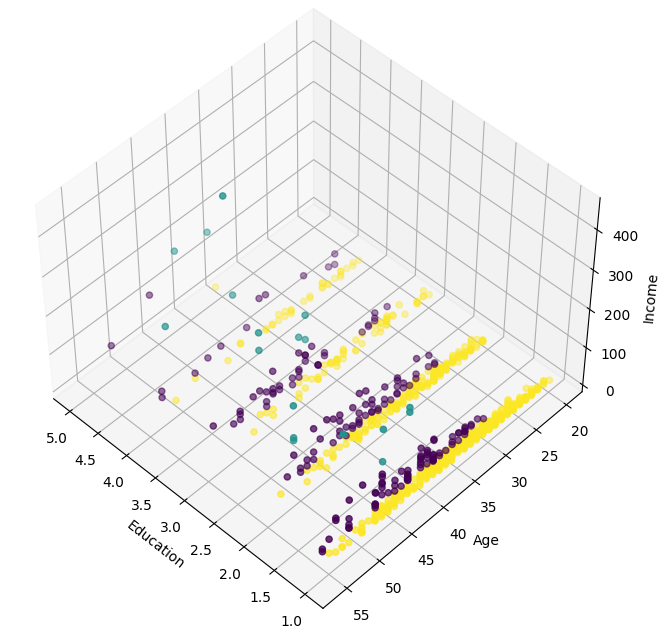

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(np.float))
